# INNOMATICS RESEARCH LABS

## NAME : ALMAS BANU

## TASK : EDA + Missing Values + Outlier + ML

### DATASET : adult.csv

####  ${{\cdot}}$ This dataset named “adult” is found in the UCI machine learning repository.
#### ${{\cdot}}$ Attribute Information:(values)

#### ${{\cdot}}$ age: continuous.
#### ${{\cdot}}$ workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
#### ${{\cdot}}$fnlwgt: continuous.
#### ${{\cdot}}$education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
#### ${{\cdot}}$education-num: continuous.
#### ${{\cdot}}$marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
#### ${{\cdot}}$occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
#### ${{\cdot}}$relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
#### ${{\cdot}}$race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
#### ${{\cdot}}$gender: Female, Male
#### ${{\cdot}}$capital-gain: continuous.
#### ${{\cdot}}$capital-loss: continuous.
#### ${{\cdot}}$hours-per-week: continuous.
#### ${{\cdot}}$native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
#### ${{\cdot}}$income: >50K, <=50K


#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [2]:
df = pd.read_csv("adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.shape

(48842, 15)

In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


#### Numerical columns

In [7]:
df_num = df.select_dtypes(['int64'])
num_cols = df_num.columns
print('Numerical Columns : {}'.format(list(num_cols)))

Numerical Columns : ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


#### Categorical Columns

In [8]:
df_cat = df.select_dtypes(['object'])
cat_cols = df_cat.columns
print('Categorical Columns : {}'.format(list(cat_cols)))

Categorical Columns : ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


#### describe()

In [9]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


#### NULL VALUES ??

In [11]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

#### There are no NAN values in the given dataset

#### Univariate Analysis

###### Histograms
Useful for visuallising distribution of 1 variable

Histogram of Column :  age


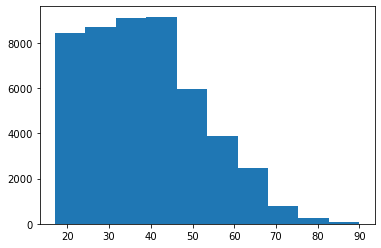


Histogram of Column :  fnlwgt


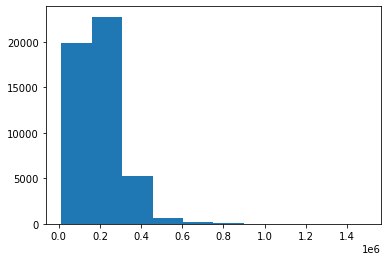


Histogram of Column :  educational-num


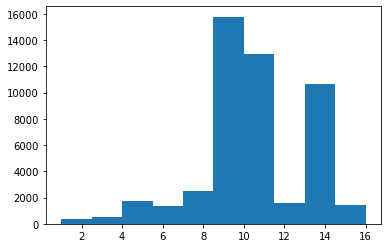


Histogram of Column :  capital-gain


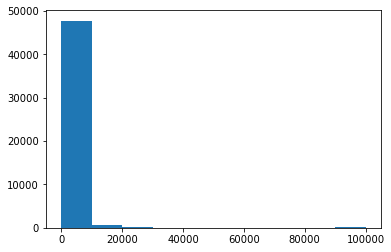


Histogram of Column :  capital-loss


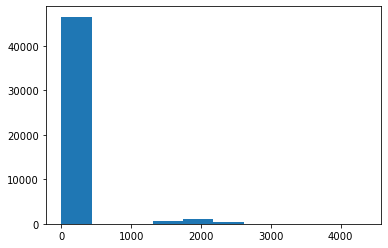


Histogram of Column :  hours-per-week


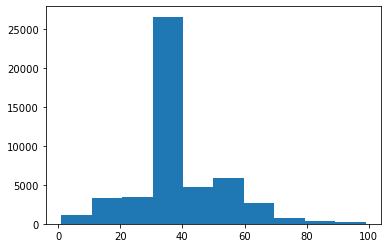

In [12]:
for col in df_num.columns:
    print("Histogram of Column : ",col)
    plt.hist(df[col])
    plt.show()
    print()

#### Function for distribution plots

In [13]:
def vis(col):
    sns.set_style("darkgrid")
    plt.figure(figsize=(10,6))
    plt.subplot(1, 2, 1)
    sns.distplot(df[col])
    plt.axvline(df[col].mean(), color="red", label="Mean")
    plt.legend(shadow=True,fontsize="larger")
    plt.subplot(1, 2, 2)
    sns.histplot(df[col])
    plt.axvline(df[col].mean(), color="black", label="Mean")
    plt.legend(shadow=True,fontsize="larger")

    skew = df[col].skew()
    kurt = df[col].kurt()
    print('Skewness:{}'.format(round(skew,3)))
    print('Kurtosis:{}'.format(round(kurt,3)))

#### Distribution of age column

Skewness:0.558
Kurtosis:-0.184


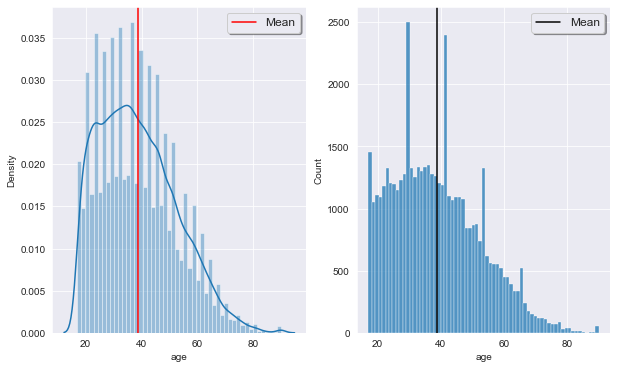

In [14]:
vis('age')

##### As we can see from the graph that there is a thick tail towards right side so it is positively skewed distribution

#### Distribution of fnlwgt column

Skewness:1.439
Kurtosis:6.058


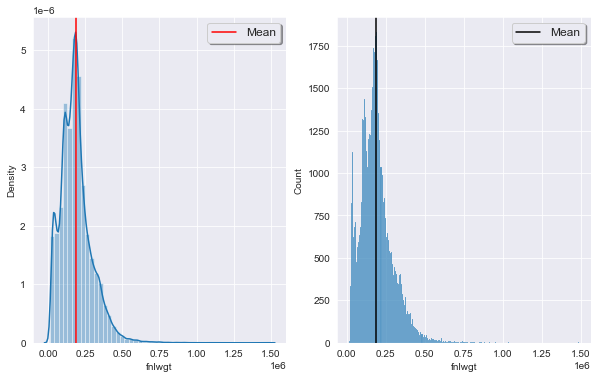

In [15]:
vis('fnlwgt')

##### ##### As we can see from the graph that there is a long tail towards right side so it may be log normal distribution

#### Distribution of educational-num column

Skewness:-0.317
Kurtosis:0.626


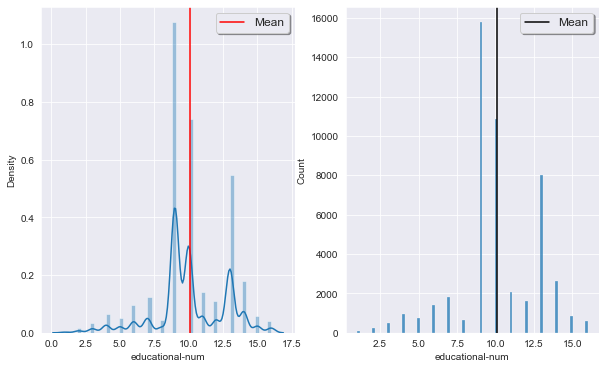

In [16]:
vis('educational-num')

##### Can't say about the distribution

#### Distribution of capital-gain column

Skewness:11.895
Kurtosis:152.693


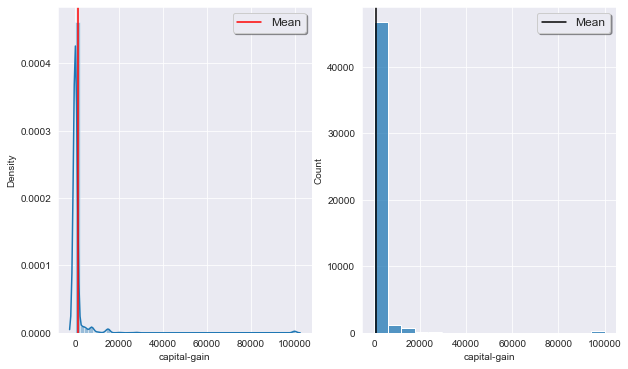

In [17]:
vis('capital-gain')

##### It can be Paretto Distribution.

#### Distribution of capital-loss column

Skewness:4.57
Kurtosis:20.014


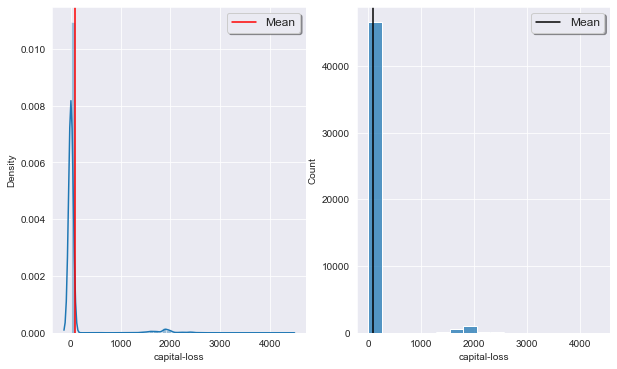

In [18]:
vis('capital-loss')

##### Paretto distribution because of longer tail

##### Distribution of hours-per-week column

Skewness:0.239
Kurtosis:2.951


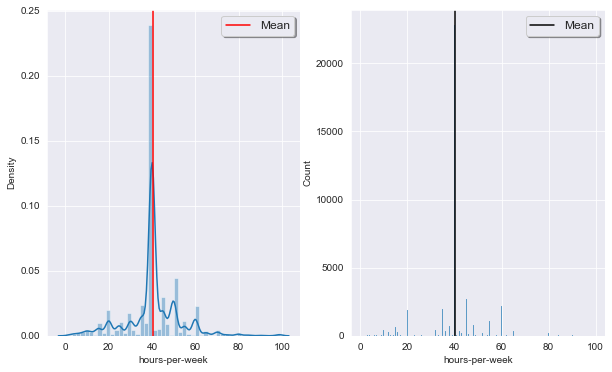

In [19]:
vis('hours-per-week')

#### Categorical Data

#### Count plot of workclass

In [20]:
df['workclass']

0             Private
1             Private
2           Local-gov
3             Private
4                   ?
             ...     
48837         Private
48838         Private
48839         Private
48840         Private
48841    Self-emp-inc
Name: workclass, Length: 48842, dtype: object

In [21]:
workclass_u = df['workclass'].unique()
len(workclass_u) 

9

In [22]:
count_w = df['workclass'].value_counts()
count_w

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

Text(0, 0.5, 'Count')

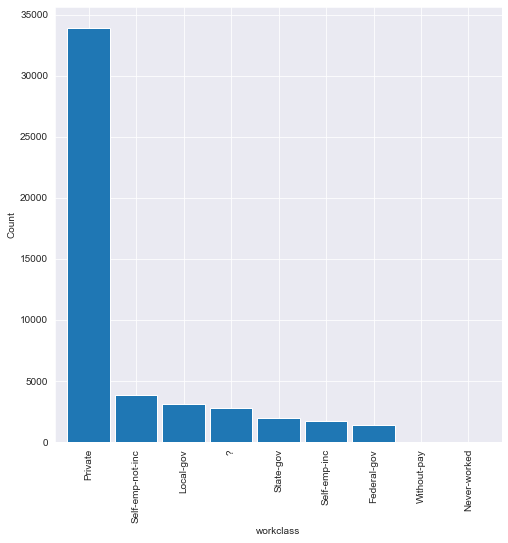

In [23]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,8))
count_w.plot(kind='bar' , width=0.9)
plt.xlabel('workclass')
plt.ylabel('Count')

#### As we can see from the plot that most of people's workclass is Private Sector.Second place by Self-emp-not-inc 

#### Count plot of education column

In [24]:
df['education']

0                11th
1             HS-grad
2          Assoc-acdm
3        Some-college
4        Some-college
             ...     
48837      Assoc-acdm
48838         HS-grad
48839         HS-grad
48840         HS-grad
48841         HS-grad
Name: education, Length: 48842, dtype: object

In [25]:
edu_u = df['education'].unique()
len(edu_u) 

16

In [26]:
edu_count = df['education'].value_counts()
edu_count

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

Text(0, 0.5, 'Count')

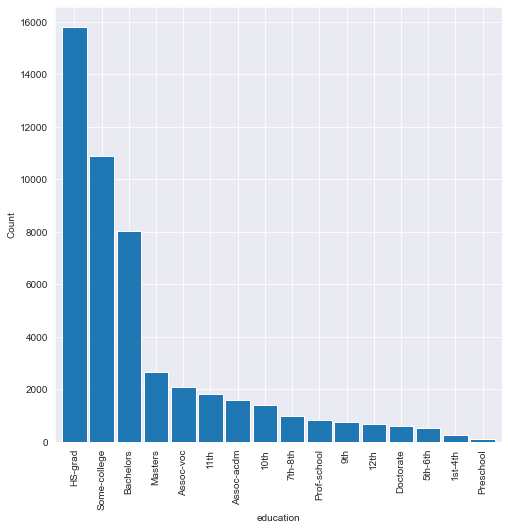

In [27]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,8))
edu_count.plot(kind='bar' , width=0.9)
plt.xlabel('education')
plt.ylabel('Count')

#### From above plot,we can see that HS-grad is highest education level.Second is Some-college.

#### Count plot of marital-status column

In [28]:
df['marital-status']

0             Never-married
1        Married-civ-spouse
2        Married-civ-spouse
3        Married-civ-spouse
4             Never-married
                ...        
48837    Married-civ-spouse
48838    Married-civ-spouse
48839               Widowed
48840         Never-married
48841    Married-civ-spouse
Name: marital-status, Length: 48842, dtype: object

In [29]:
marry_u = df['marital-status'].unique()
len(marry_u) 

7

In [30]:
count_m = df['marital-status'].value_counts()
count_m

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

Text(0, 0.5, 'Count')

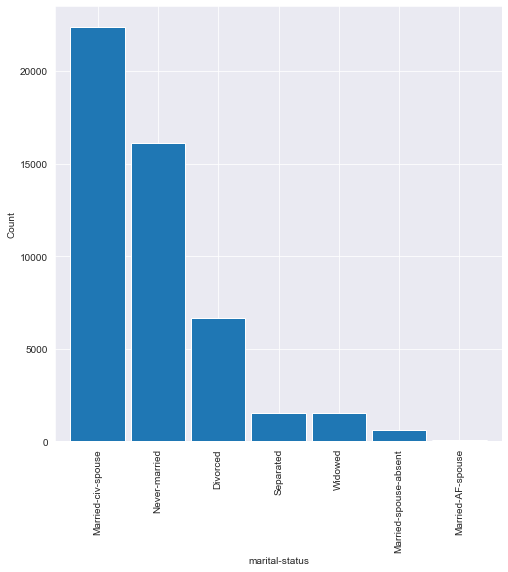

In [31]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,8))
count_m.plot(kind='bar' , width=0.9)
plt.xlabel('marital-status')
plt.ylabel('Count')

#### First place is for Married-civ-spouse and in second place we have Never-married

#### Countplot of occupation column

In [32]:
df['occupation']

0        Machine-op-inspct
1          Farming-fishing
2          Protective-serv
3        Machine-op-inspct
4                        ?
               ...        
48837         Tech-support
48838    Machine-op-inspct
48839         Adm-clerical
48840         Adm-clerical
48841      Exec-managerial
Name: occupation, Length: 48842, dtype: object

In [33]:
occup_u = df['occupation'].unique()
len(occup_u) 

15

In [34]:
count_o = df['occupation'].value_counts()
count_o

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

Text(0, 0.5, 'Count')

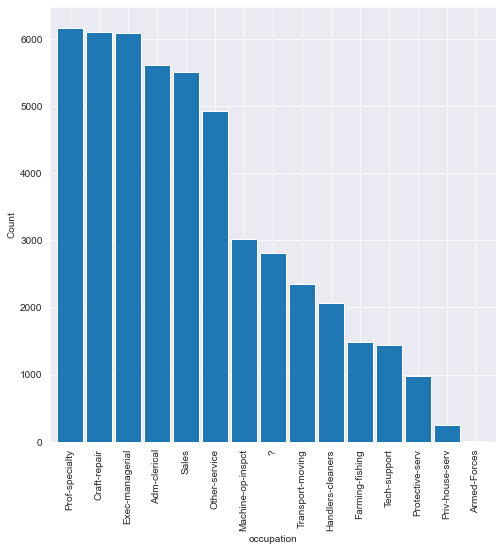

In [35]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,8))
count_o.plot(kind='bar' , width=0.9)
plt.xlabel('occupation')
plt.ylabel('Count')

##### From the plot,Prof-speciality occupation is highest and second is Craft-repair.

#### Countplot of relationship column

In [36]:
df['relationship']

0        Own-child
1          Husband
2          Husband
3          Husband
4        Own-child
           ...    
48837         Wife
48838      Husband
48839    Unmarried
48840    Own-child
48841         Wife
Name: relationship, Length: 48842, dtype: object

In [37]:
relation_u = df['relationship'].unique()
len(relation_u) 

6

In [38]:
count_r = df['relationship'].value_counts()
count_r

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

Text(0, 0.5, 'Count')

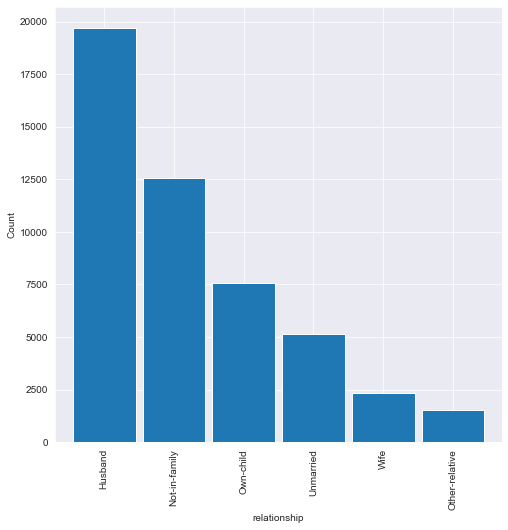

In [39]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,8))
count_r.plot(kind='bar' , width=0.9)
plt.xlabel('relationship')
plt.ylabel('Count')

#### The highest number of persons are husbands.

#### Countplot of race column

In [40]:
df['race']

0        Black
1        White
2        White
3        Black
4        White
         ...  
48837    White
48838    White
48839    White
48840    White
48841    White
Name: race, Length: 48842, dtype: object

In [41]:
race_u = df['race'].unique()
len(race_u) 

5

In [42]:
count_ra = df['race'].value_counts()
count_ra

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

Text(0, 0.5, 'Count')

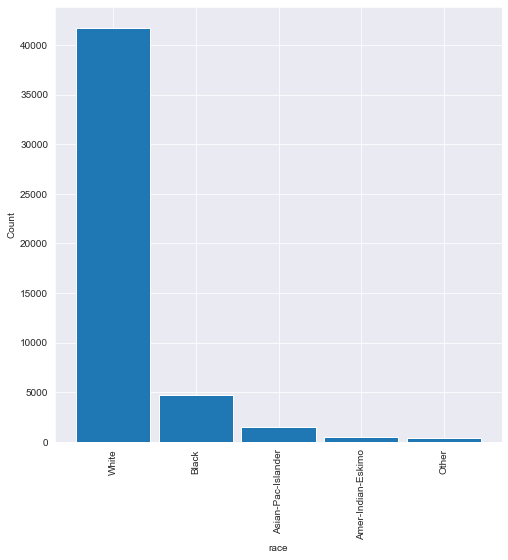

In [43]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,8))
count_ra.plot(kind='bar' , width=0.9)
plt.xlabel('race')
plt.ylabel('Count')

##### White race people are highest in number.

#### Countplot of gender column

In [44]:
df['gender']

0          Male
1          Male
2          Male
3          Male
4        Female
          ...  
48837    Female
48838      Male
48839    Female
48840      Male
48841    Female
Name: gender, Length: 48842, dtype: object

In [45]:
gender_u = df['gender'].unique()
len(gender_u) 

2

In [46]:
count_g = df['gender'].value_counts()
count_g

Male      32650
Female    16192
Name: gender, dtype: int64

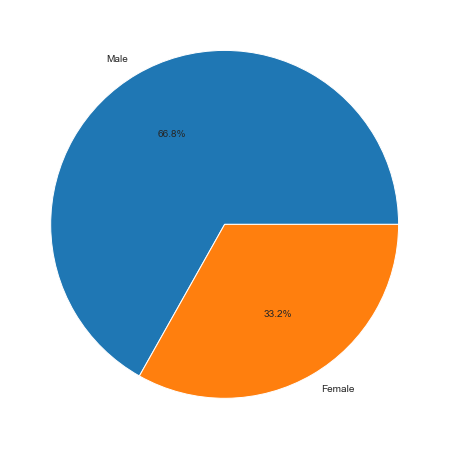

In [47]:
# Since only 2 values Pie chart is good to visualize
plt.figure(figsize=(10,8))
labels=['Male','Female']
data=df.gender.value_counts()
plt.pie(data,labels=labels,autopct="%.1f%%")
plt.show()

##### Males are more than Females.

#### Countplot of native-country column

In [48]:
df['native-country']

0        United-States
1        United-States
2        United-States
3        United-States
4        United-States
             ...      
48837    United-States
48838    United-States
48839    United-States
48840    United-States
48841    United-States
Name: native-country, Length: 48842, dtype: object

In [49]:
native_u = df['native-country'].unique()
len(native_u) 

42

In [50]:
count_n = df['native-country'].value_counts()
count_n

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

Text(0, 0.5, 'Count')

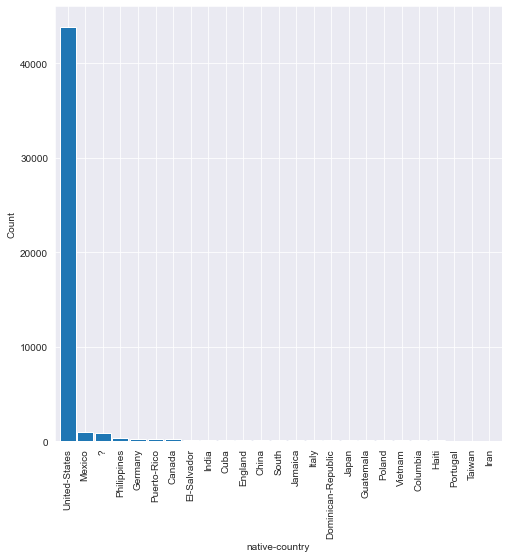

In [51]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,8))
count_n[:25].plot(kind='bar' , width=0.9)
plt.xlabel('native-country')
plt.ylabel('Count')

##### Most people's native-country is United-States

#### Countplot of income column

In [52]:
df['income']

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48842, dtype: object

In [53]:
income_u = df['income'].unique()
len(income_u) 

2

In [54]:
count_i = df['income'].value_counts()
count_i

<=50K    37155
>50K     11687
Name: income, dtype: int64

Text(0, 0.5, 'Count')

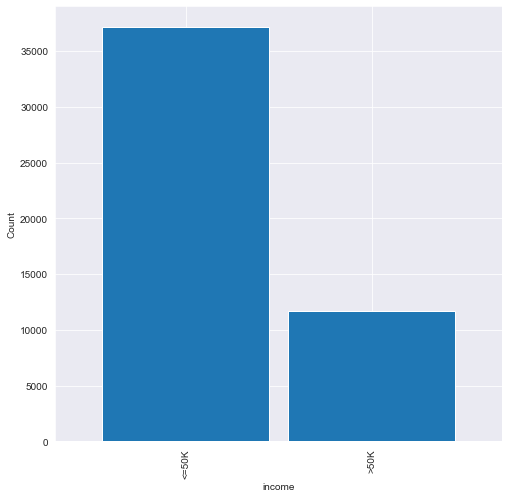

In [55]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,8))
count_i.plot(kind='bar' , width=0.9)
plt.xlabel('income')
plt.ylabel('Count')

##### <= 50K is highest income 

#### Bivariate Analysis

<AxesSubplot:xlabel='age', ylabel='income'>

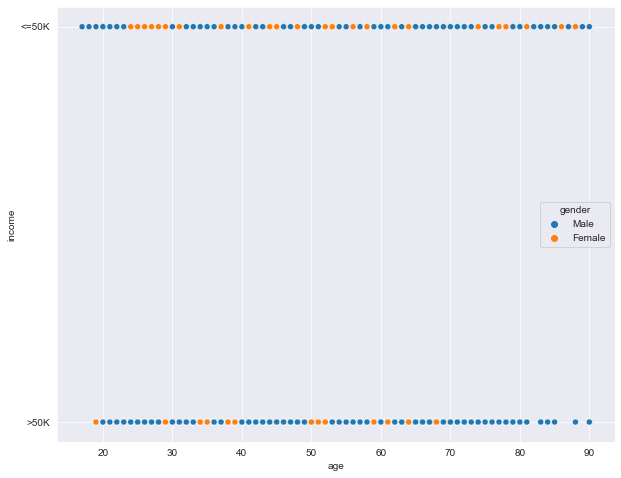

In [56]:
# Relation between age and income
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.scatterplot(data=df,x="age",y="income",hue="gender")

#### No correlation

#### age v/s workclass

<AxesSubplot:xlabel='age', ylabel='workclass'>

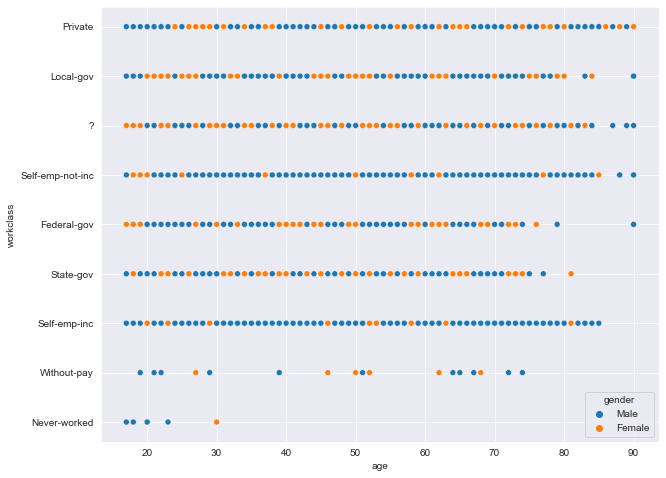

In [57]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.scatterplot(data=df,x="age",y="workclass",hue="gender")

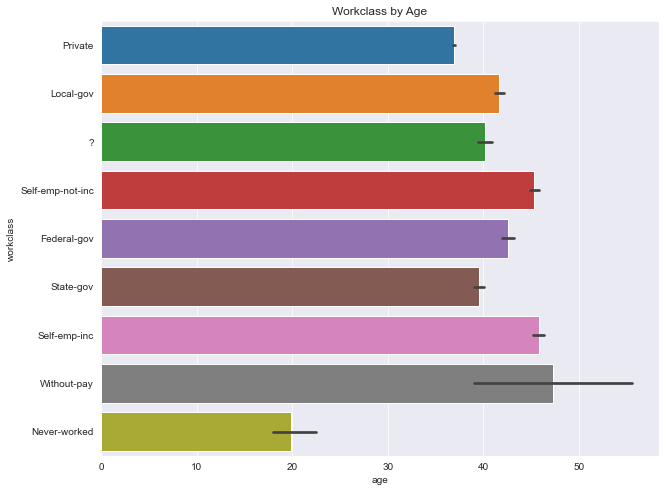

In [58]:
plt.figure(figsize=(10,8))
sns.barplot(y='workclass',x='age',data=df)
plt.title('Workclass by Age')
plt.show()

#### age v/s marital-status distribution

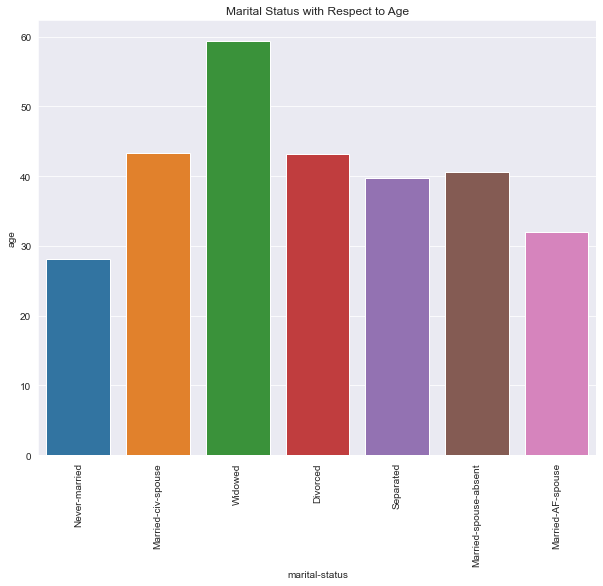

In [59]:
plt.figure(figsize=(10,8))
sns.barplot(x='marital-status',y='age',ci=None,data=df)
plt.title('Marital Status with Respect to Age')
plt.xticks(rotation=90)
plt.show()

#### There is a low correlation

#### Income with respect to age

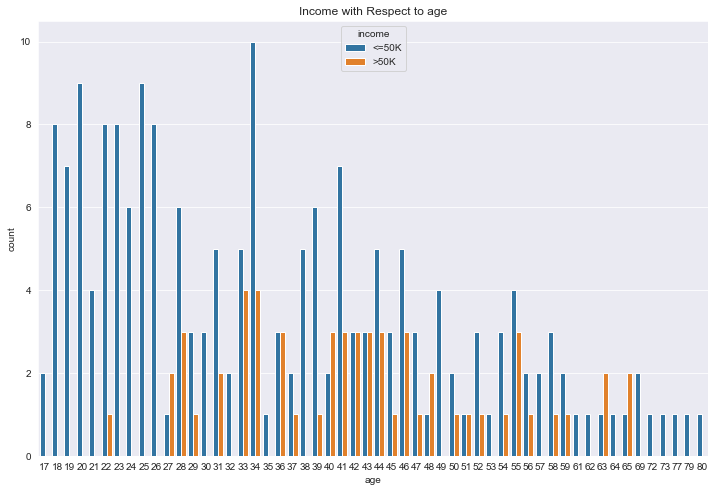

In [60]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.countplot(x=df['age'][:250],hue='income',data=df)
plt.title('Income with Respect to age')
plt.show()

#### There is a weak positive correlation

#### income with respect to relationship status

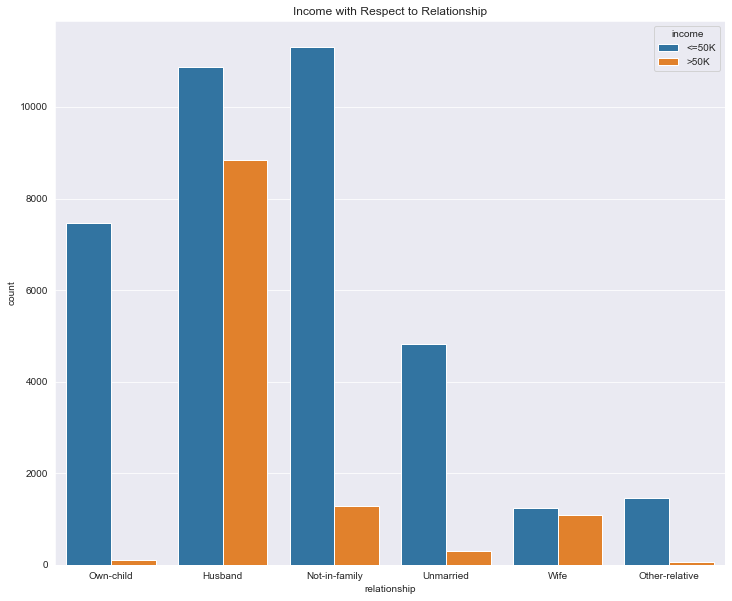

In [61]:
plt.figure(figsize=(12,10))
sns.set_style('darkgrid')
sns.countplot(x='relationship',hue='income',data=df)
plt.title('Income with Respect to Relationship')
plt.show()

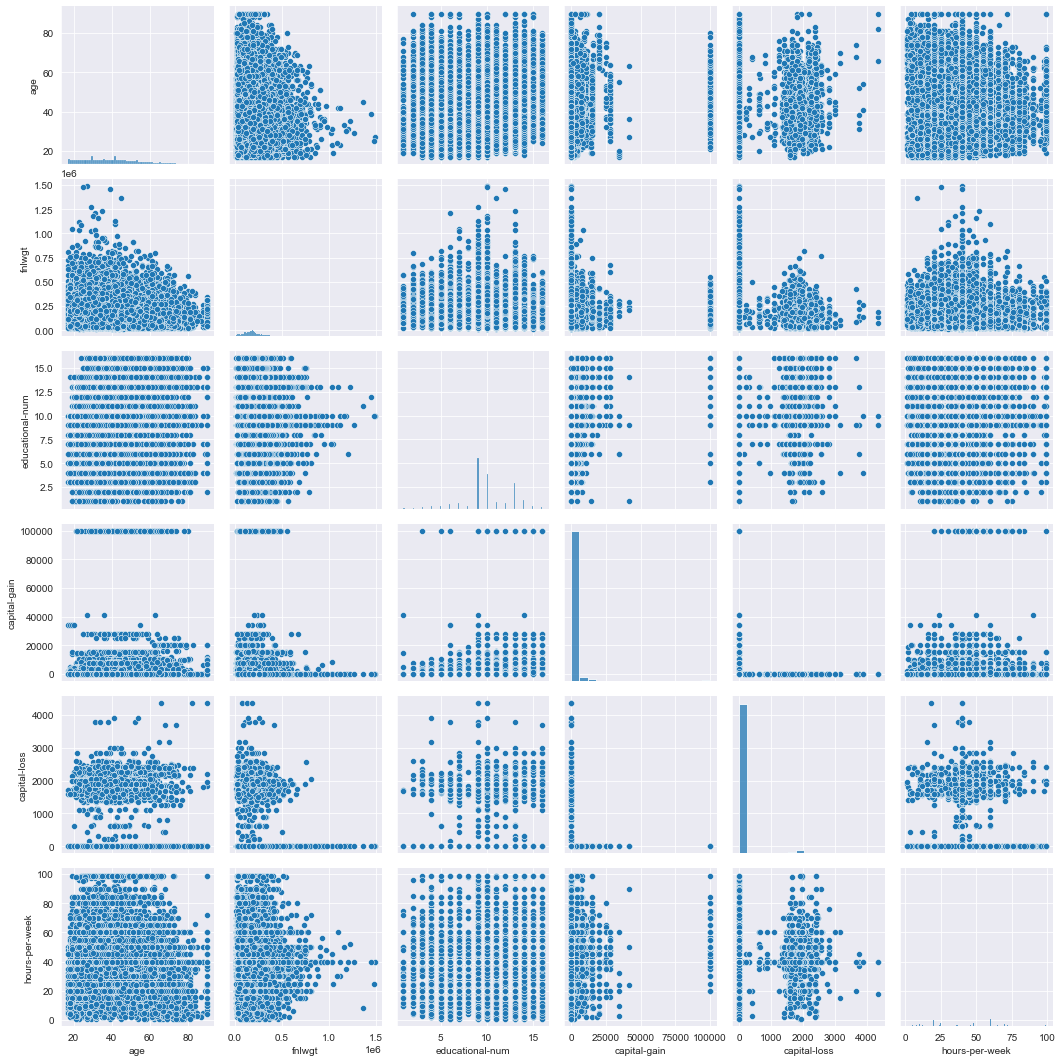

In [62]:
# Pairplot
sns.pairplot(df)

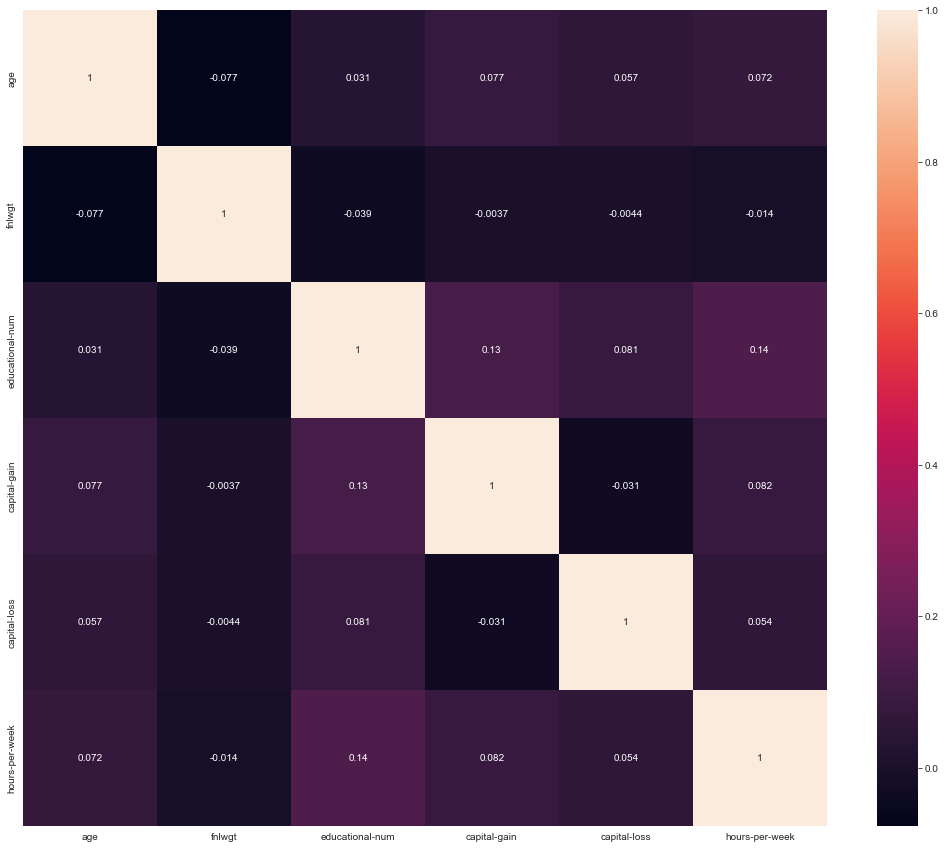

In [63]:
# Heatmap
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

#### income with respect to occupation

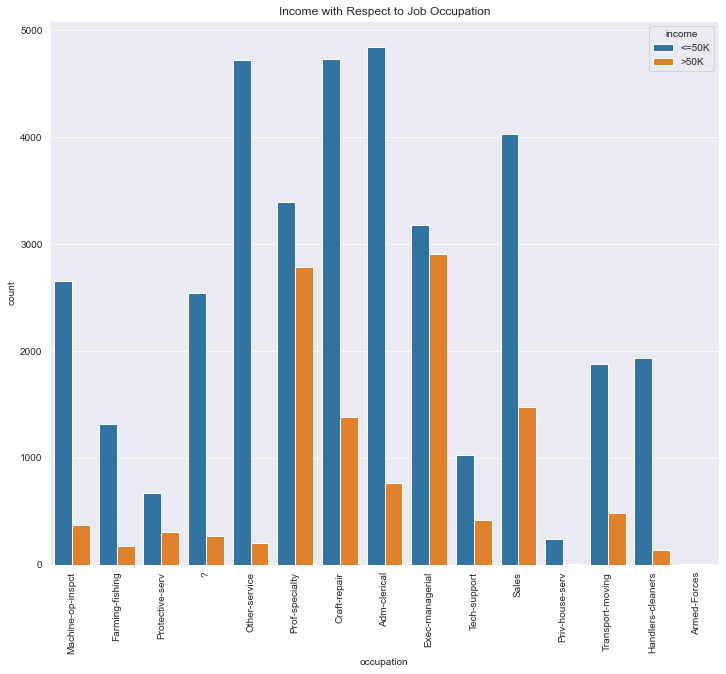

In [64]:
plt.figure(figsize=(12,10))
sns.set_style('darkgrid')
sns.countplot(x='occupation',hue='income',data=df)
plt.title('Income with Respect to Job Occupation')
plt.xticks(rotation=90)
plt.show()

#### income with respect to education

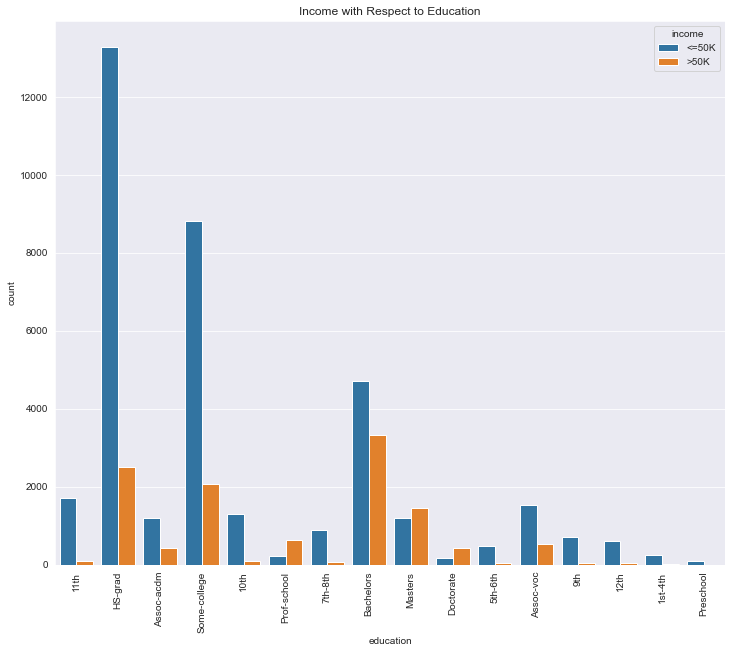

In [65]:
plt.figure(figsize=(12,10))
sns.set_style('darkgrid')
sns.countplot(x='education',hue='income',data=df)
plt.title('Income with Respect to Education')
plt.xticks(rotation=90)
plt.show()

#### Treating outliers and missing values

#### In native-country column we saw a value called '?' we don't have any native-country name by this name so this might be a wrong value or null value.
#### Like this we can see the null values are exists in the dataset as '?'. So we'll replace those with nan values.

In [66]:
cols = list(df.columns)
for col in cols:    
    df[col] = df[col].replace('?',np.nan)

In [67]:
df.isnull().any()

age                False
workclass           True
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation          True
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country      True
income             False
dtype: bool

#### So workclass,occupation and native-country have null values now

In [68]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

#### Dropping the null values is best idea according to most of research papers. Since there 48 thousand+ values for  a attribute in datset,Removing 2000 or 800 values doesn't affect much so drop null values. 

In [69]:
df = df.loc[df['workclass'].notnull(), :]
df = df.loc[df['occupation'].notnull(), :]
df = df.loc[df['native-country'].notnull(), :]

In [70]:
df.isnull().any() 

age                False
workclass          False
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation         False
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool

#### No null values 

#### columns like fnlwgt,capital-loss and capital-gain are of no use in this analysis because they don't say much about data so we can drop them

In [71]:
df.drop(['fnlwgt','capital-gain','capital-loss'],axis=1,inplace=True)
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K


#### We noticed that income has only two values <=50K and >50K we can use dummies and make it more readable by giving low and high respectively.

In [72]:
df['income'] = df['income'].replace({'<=50K': 'low', '>50K': 'high'})

In [73]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,low
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,low
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,high
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,high
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,low


#### In native-country column Most of the people's native-country was United-States so the other states were very less so we can make it having if another country is there then make it other-country doing this we will have either United-Staes or other-country

In [74]:
df.loc[df['native-country'] != 'United-States', 'native-country'] = 'Other-Country'

#### Since 72% of the citizens living in United-States are White American(note: the U.S. the U.S. Source sensus),
#### we can reduce race category into two categories White and others.
#### It will also helpful when we will do dummies it will reduce the number of columns in the dataset.


In [75]:
df.loc[df['race'] != 'White', 'race'] = 'Other'

In [76]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Other,Male,40,United-States,low
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,low
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,high
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Other,Male,40,United-States,high
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,low


#### Number of Outliers in Each numeric column

In [77]:
numeric_data = df.select_dtypes(['int64','float64']).columns
# Creating a new dataframe
outliers = pd.DataFrame(columns=['Feature','Outliers','Percentage']) 
    
for column in list(numeric_data):  
    # first quartile
    q1 = df[column].quantile(0.25)
    # third quartile
    q3 = df[column].quantile(0.75) 
    # Inter Quantile Range
    iqr = q3 - q1 
        
    lower_value = q1 - (1.5*iqr)        
    upper_value = q3 + (1.5*iqr)
        
    total_outlier = df[(df[column] < lower_value) | (df[column] > upper_value)].shape[0]    
    percent = (total_outlier / len(df[column])) * 100
    outliers = outliers.append({'Feature':column,'Outliers':total_outlier,'Percentage':percent},ignore_index=True)
        
outliers

,Feature,Outliers,Percentage
0,age,269,0.594843
1,educational-num,294,0.650126
2,hours-per-week,11899,26.312414


#### In hours-per-week column we have many outliers which have to be treated.

#### Box-plot of hours-per-week column

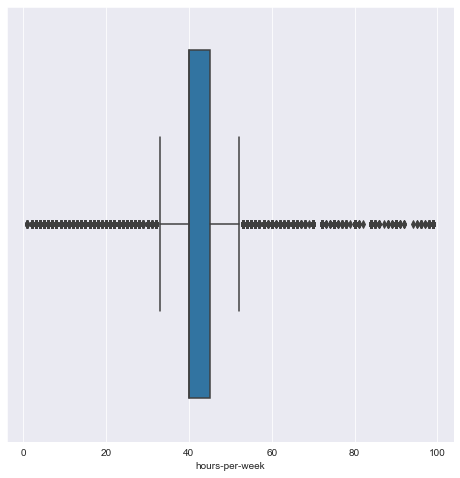

In [78]:
plt.figure(figsize=(8,8))
sns.set_style('darkgrid')
sns.boxplot(df['hours-per-week'])
plt.show()

#### There are outliers on both side of whiskers

#### Q-Q Plot to check for normality

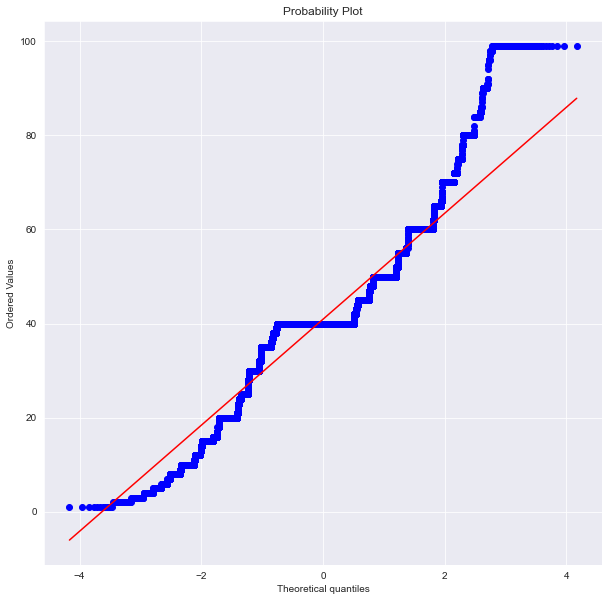

In [79]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
stats.probplot(df['hours-per-week'],dist='norm', plot=plt)
plt.show()

#### Box-cox transformation to normalize

In [80]:
h1 , r = stats.boxcox(df['hours-per-week'])
print(r)

0.957404248835031


#### Q-Q Plot to check normality of transformed data

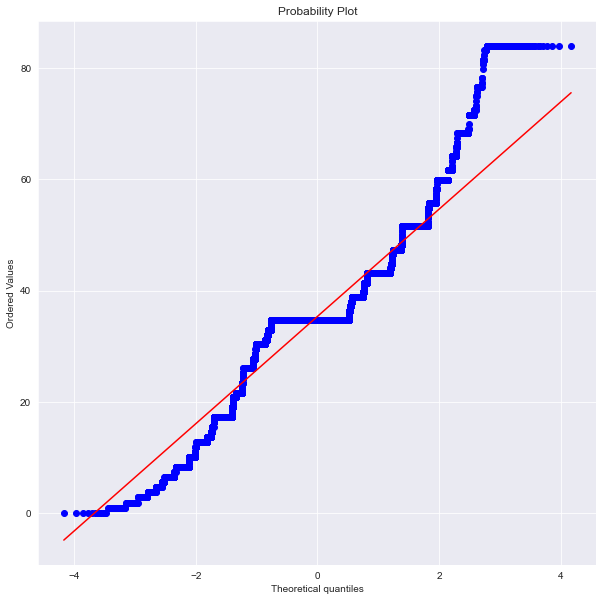

In [81]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
stats.probplot(h1 , dist='norm' , plot=plt)
plt.show()

#### Now also it is not normalized so Box-cox was not helpful!

#### Mean Imputation in column hours-per-week

In [82]:
q1 = df['hours-per-week'].quantile(0.25)
q3 = df['hours-per-week'].quantile(0.75)
iqr = q3-q1
low_tail = q1 - 1.5 * iqr
up_tail = q3 + 1.5 * iqr
mean = np.mean(df['hours-per-week'])
for i in df['hours-per-week']:
    if i > up_tail or i < low_tail:
            df['hours-per-week'] = df['hours-per-week'].replace(i, mean)

#### Box-plot after Mean imputation

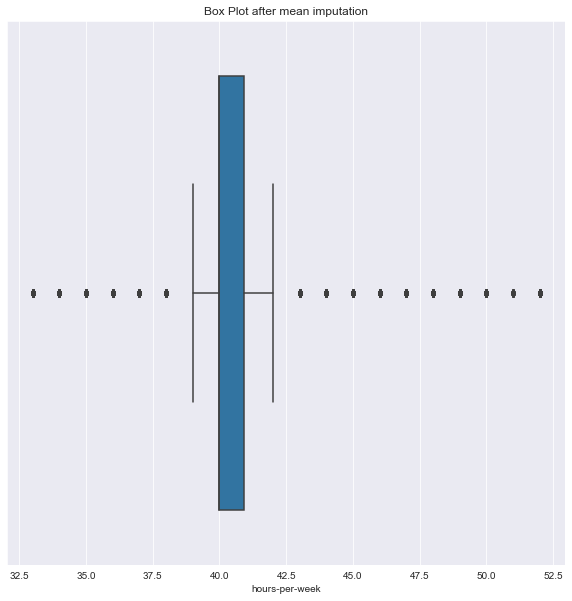

In [83]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.boxplot(df['hours-per-week'])
plt.title("Box Plot after mean imputation")
plt.show()

#### There are still few outliers but it is okay to keep them they are not affecting that much to our dataset.

### Feature Transformation

In [84]:
num_data = df.select_dtypes(['int64','float64'])
num_cols = num_data.columns
print('Numerical Columns : {}'.format(list(num_cols)))

Numerical Columns : ['age', 'educational-num', 'hours-per-week']


#### Column standardization using MinMax Scaler

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [86]:
num = df.select_dtypes(include=['int64', 'float64'])   
df_num = pd.DataFrame(scaler.fit_transform(num),columns = num.columns)
df_num.head()

,age,educational-num,hours-per-week
0,0.109589,0.400000,0.368421
1,0.287671,0.533333,0.894737
2,0.150685,0.733333,0.368421
3,0.369863,0.600000,0.368421
4,0.232877,0.333333,0.417790


#### For Categorical Data

#### Using One-Hot Encoding

In [87]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

In [88]:
cat = df.select_dtypes('object')
df_cat = pd.DataFrame(encoder.fit_transform(cat), 
                      columns=encoder.get_feature_names(cat.columns))
df_cat.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,gender_Male,native-country_United-States,income_low
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


#### Change in column number depicts it all

#### Dataset after standardization

In [89]:
std_df = pd.concat([df_num,df_cat], axis = 1)
std_df.head()

,age,educational-num,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,...,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,gender_Male,native-country_United-States,income_low
0,0.109589,0.400000,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,0.287671,0.533333,0.894737,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0.150685,0.733333,0.368421,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.369863,0.600000,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.232877,0.333333,0.417790,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


#### Columns 

In [90]:
new_df = std_df.iloc[:,:-1] 
target = std_df.iloc[:,-1]

In [91]:
new_df

,age,educational-num,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,...,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,gender_Male,native-country_United-States
0,0.109589,0.400000,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.287671,0.533333,0.894737,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.150685,0.733333,0.368421,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.369863,0.600000,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.232877,0.333333,0.417790,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0.136986,0.733333,0.263158,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
45218,0.315068,0.533333,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
45219,0.561644,0.533333,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
45220,0.068493,0.533333,0.417790,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0


In [92]:
target

0        1.0
1        1.0
2        0.0
3        0.0
4        1.0
        ... 
45217    1.0
45218    0.0
45219    1.0
45220    1.0
45221    0.0
Name: income_low, Length: 45222, dtype: float64

#### Splitting dataset into train and test data.

In [93]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(new_df, target, test_size = 0.3)

#### Applying Machine Learning Models to data

In [94]:
from sklearn.linear_model import LogisticRegression

Logistic_model = LogisticRegression()
Logistic_model.fit(x_train, y_train)
y_pred_log = Logistic_model.predict(x_test)

from sklearn import metrics

Logistic_acc= round(metrics.accuracy_score(y_test, y_pred_log),2)*100
Logistic_acc

83.0

#### Applying Decision Tree classifier

In [95]:
from sklearn.tree import DecisionTreeClassifier

Dtc_model = DecisionTreeClassifier(criterion='entropy',random_state=0)
Dtc_model.fit(x_train,y_train)
y_pred_Dtc = Dtc_model.predict(x_test)

Dtc_Acc = round(metrics.accuracy_score(y_test, y_pred_Dtc),2)*100
Dtc_Acc

77.0

#### Applying Random Forest classifier

In [96]:
from sklearn.ensemble import RandomForestClassifier

Rf_model = RandomForestClassifier()
Rf_model.fit(x_train, y_train)
y_pred_Rf = Rf_model.predict(x_test)

Rf_Acc = round(Rf_model.score(x_test,y_test),2)*100
Rf_Acc

81.0

#### Applying Extra Tree classifier

In [97]:
from sklearn.ensemble import ExtraTreesClassifier

Etc_model = ExtraTreesClassifier(n_estimators=100, random_state=0)
Etc_model.fit(x_train, y_train)
y_pred_Etc = Etc_model.predict(x_test)

Etc_Acc = round(Etc_model.score(x_test,y_test),2)*100
Etc_Acc

80.0

#### Applying Gradient Boosting classifier

In [98]:
from sklearn.ensemble import GradientBoostingClassifier

Gbc_model = GradientBoostingClassifier(random_state = 0)
Gbc_model.fit(x_train, y_train)

Gbc_Acc = round(Gbc_model.score(x_test,y_test),2)*100
Gbc_Acc

83.0

#### Applying K Nearest Neighbor classifier

In [99]:
from sklearn.neighbors import KNeighborsClassifier

Knn_model=KNeighborsClassifier(n_neighbors=3)
Knn_model.fit(x_train,y_train)
y_pred_Knn=Knn_model.predict(x_test)

Knn_Acc = round(Knn_model.score(x_test,y_test),2)*100
Knn_Acc

81.0

#### Performance of Each Model

In [100]:
models = {
    'Logistic Regression':Logistic_acc,
    'DecisionTreeClassifier':Dtc_Acc,
    'KNeighborsClassifier':Knn_Acc,
    'RandomForestClassifier':Rf_Acc,
    'ExtraTreesClassifier':Etc_Acc,
    'GradientBoostingClassifier':Gbc_Acc,
}

models_score = pd.DataFrame.from_dict(data = models, orient='index',columns=['Value'])

models_score.sort_values(by='Value', ascending=False)

,Value
Logistic Regression,83.0
GradientBoostingClassifier,83.0
KNeighborsClassifier,81.0
RandomForestClassifier,81.0
ExtraTreesClassifier,80.0
DecisionTreeClassifier,77.0


### CONCLUSION :
#### ${{\cdot}}$ The given dataset was about the individuals income.
#### ${{\cdot}}$ There were too much outliers in the columns which were treated well.
#### ${{\cdot}}$ There were missing values in the dataset as '?' which were treated.
#### ${{\cdot}}$ The data was pretty much skewed which I handled well.
#### ${{\cdot}}$ For bivariate analysis we figured out some of the correlations.
#### ${{\cdot}}$ Feature transformation using MinMaxScalar and dummies.
#### ${{\cdot}}$ After cleaning the dataset we applied machine learning model withrespect to income and we got values for them.
#### ${{\cdot}}$ In case of visualization part,I have used scatterplots,histograms,barplots,countplots,distplots,piechart.


## THANK YOU